# 实践练习 – 模型训练和评估

# 问题 1：垃圾邮件分类

在本示例中，您需要将电子邮件分类为垃圾邮件或非垃圾邮件。

您将使用加州大学欧文分校 (UCI) 机器学习库中的 [Spambase 数据集](https://archive.ics.uci.edu/ml/datasets/Spambase)。

__来源信息：__

创建者：
Mark Hopkins、Erik Reeber、George Forman 和 Jaap Suermondt，惠普实验室（地址：美国加利福尼亚州帕洛阿尔托市 Page Mill 路 1501 号，邮编：94304）

捐赠者：
George Forman gforman@hpl.hp.com 650-857-7835

----------------------------------------------------------------------------

数据具有 57 个属性和 1 个目标。具体描述如下。

– 48 个类型为 word_freq_WORD 的连续实数 [0,100] 属性 
= 电子邮件中与 WORD 匹配的单词的百分比
即 100 *（WORD 在电子邮件中出现的次数）/ 
电子邮件中单词的总数。在这种情况下，“WORD”是 
由非字母数字字符或字符串结尾限定的 
字母数字字符的任何字符串。

– 6 个类型为 char_freq_CHAR 的连续实数 [0,100] 属性
= 电子邮件中与 CHAR 匹配的字符的百分比
即 100*（CHAR 出现的次数）/ 电子邮件中的总字符数

– 1 个类型为 capital_run_length_average 的连续实数 [1,...] 属性
= 不间断的大写字母序列的平均长度

– 1 个类型为 capital_run_length_longest 的连续整数 [1,...] 属性
= 最长的不间断大写字母序列的长度

– 1 个类型为 capital_run_length_total 的连续整数 [1,...] 属性
= 不间断的大写字母序列的长度总和
= 电子邮件中大写字母的总数

– 1 个类型为垃圾邮件的定类 {0,1} 属性
= 表示该电子邮件是被视为垃圾邮件 (1)，还是非垃圾邮件 (0)，垃圾邮件也称为未经请求的商业电子邮件。 

## 1.获取数据

In [1]:
import subprocess
import os

# 检查文件是否已位于所需路径中，或者是否需要下载
# 文件下载源：https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

base_path = '/home/ec2-user/SageMaker/data/'
file_path = 'spambase.data'

if not os.path.isfile(base_path + file_path):
    subprocess.run(['mkdir', '-p', base_path])
    subprocess.run(['aws', 's3', 'cp',
                    's3://aws-tc-largeobjects/ILT-TF-200-MLDWTS/lab3/',
                    base_path,'--recursive'])
else:
    print('File already downloaded!')

In [2]:
import csv
import numpy as np

data = []

f = open('/home/ec2-user/SageMaker/data/spambase.data')
reader = csv.reader(f)
next(reader, None)
for row in reader:
    data.append(row)
f.close()

将数据写入 DataFrame，以便更加轻松地进行可视化和分析。此外，添加来自数据集包中“spambase.names”文件的属性名称。

In [3]:
import pandas as pd

df = pd.DataFrame(data=np.array(data).astype(np.float), columns=["word_freq_make",
            "word_freq_address",
            "word_freq_all",
            "word_freq_3d",
            "word_freq_our",
            "word_freq_over",
            "word_freq_remove",
            "word_freq_internet",
            "word_freq_order",
            "word_freq_mail",
            "word_freq_receive",
            "word_freq_will",
            "word_freq_people",
            "word_freq_report",
            "word_freq_addresses",
            "word_freq_free",
            "word_freq_business",
            "word_freq_email",
            "word_freq_you",
            "word_freq_credit",
            "word_freq_your",
            "word_freq_font",
            "word_freq_000",
            "word_freq_money",
            "word_freq_hp",
            "word_freq_hpl",
            "word_freq_george",
            "word_freq_650",
            "word_freq_lab",
            "word_freq_labs",
            "word_freq_telnet",
            "word_freq_857",
            "word_freq_data",
            "word_freq_415",
            "word_freq_85",
            "word_freq_technology",
            "word_freq_1999",
            "word_freq_parts",
            "word_freq_pm",
            "word_freq_direct",
            "word_freq_cs",
            "word_freq_meeting",
            "word_freq_original",
            "word_freq_project",
            "word_freq_re",
            "word_freq_edu",
            "word_freq_table",
            "word_freq_conference",
            "char_freq_;",
            "char_freq_(",
            "char_freq_[",
            "char_freq_!",
            "char_freq_$",
            "char_freq_#",
            "capital_run_length_average",
            "capital_run_length_longest",
            "capital_run_length_total",
            "target"]
            )

查看数据的形状。如预期一样有 58 列（包括目标）。

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0


“df.describe()”函数提供有关特征的统计汇总。

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 2.训练模型

在本节中，您将执行以下操作：

– 将数据集拆分为训练、验证和测试子集
– 使用 Amazon SageMaker 线性学习器算法训练模型

> ### 问题 1 – 训练-测试-验证拆分
>
> 训练机器学习模型的一个重要部分是将数据拆分为训练、验证和测试子集。您将使用“sklearn”库中的“train_test_split()”函数（[文档](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)）。

> 看一下此示例：
>
> `train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)` 
>
> 此函数会按给定的比例 (test_size) 拆分输入特征“X”和目标“y”对。此特定示例将数据拆分为训练 (80%) 和测试 (20%) 子集。
>
> 使用此函数__两次__，将数据拆分为__训练 (80%)__、__验证 (10%)__ 和__测试 (10%)__ 子集。

In [6]:
from sklearn.model_selection import train_test_split

# 获取目标列（不含）之前的特征值
X = df.values[:, :-1].astype(np.float32)

# 获取目标列
y = df.values[:, -1].astype(np.float32)

# 获取 80% 的数据用于训练；剩下的 20% 将用于验证和测试
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# 将剩余 20% 的数据一分为二，10% 用于测试，10% 用于验证
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (3680, 57)
Length of train_labels is: (3680,)
Length of val_features is: (460, 57)
Length of val_labels is: (460,)
Length of test_features is: (460, 57)
Length of test_labels is: (460,)


现在，调用 Amazon SageMaker 的“LinearLearner()”算法。本示例使用一个“ml.m4.xlarge”实例来进行训练。“predictor_type”设置为 __'binary_classifier'__，因为数据有两类：“垃圾邮件”和“非垃圾邮件”。

In [7]:
import sagemaker

# 调用线性学习器评估程序对象
binary_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='binary_classifier')

使用二进制评估程序的“record_set()”函数来设置评估程序的训练、验证和测试部分。

In [8]:
train_records = binary_estimator.record_set(train_features, train_labels, channel='train')
val_records = binary_estimator.record_set(val_features, val_labels, channel='validation')
test_records = binary_estimator.record_set(test_features, test_labels, channel='test')

“fit()”函数应用随机梯度下降 (SGD) 算法的分布式版本，而且我们会将数据发送给它。

In [9]:
binary_estimator.fit([train_records, val_records, test_records])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-05-17 03:31:35 Starting - Starting the training job...
2021-05-17 03:31:58 Starting - Launching requested ML instancesProfilerReport-1621222295: InProgress
......
2021-05-17 03:33:03 Starting - Preparing the instances for training.........
2021-05-17 03:34:30 Downloading - Downloading input data
2021-05-17 03:34:30 Training - Downloading the training image....Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/17/2021 03:35:14 INFO 139653810292544] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 

## 3.评估模型

在本节中，您将了解模型在测试数据集上的表现。

### Amazon SageMaker 分析
您可以使用“sagemaker.analytics”获取一些性能指标。这不需要部署模型。由于这是一个分类问题，您可以检查准确率、查准率和查全率。

In [10]:
sagemaker.analytics.TrainingJobAnalytics(binary_estimator._current_job_name,
                                         metric_names = ['test:binary_classification_accuracy',
                                                         'test:precision',
                                                         'test:recall']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:binary_classification_accuracy,0.908696
1,0.0,test:precision,0.869565
2,0.0,test:recall,0.898876


### 部署模型
要部署模型，请运行以下单元。

**注意**：这需要一些时间才能完成。在等待的过程中，请思考问题 2 的答案。

In [11]:
binary_predictor = binary_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

> ### 问题 2 – 评估指标选择
> 选择评估指标时，您需要考虑业务及其相关限制。在本例中，垃圾邮件检测需要注意误报。误报意味着正常的邮件被分类为垃圾邮件。由于垃圾邮件通常会转到垃圾邮件文件夹，所以用户会因为误报而错失重要信息。

> 一些常见评估指标如下所示：
   - 准确率 = (TP + TN) / (TP + FP + FN + TN)
   - 查准率 = (TP  / (TP + FP)
   - 查全率 = (TP) / (TP + FN)
>
> 根据已有信息，在所提供的指标中，您认为最需要考虑的指标是哪一个？

**答案**：在这里，最需要考虑查准率，因为它能说明误报情况。高查准率意味着高 TP 和低 FP。

您已经有一个托管的终端节点在运行了，现在您只需提出 POST 请求，即可轻松地利用模型进行实时预测。首先，您需要设置序列化器和解串器，以便将“test_features”NumPy 数组传递给终端节点后面的模型。您还需要计算模型的混淆矩阵，以便评估它在测试数据上的表现。

> ### 问题 3 – 计算指标
>
> 在本问题中，您需要计算一些重要的评估指标。示例为准确率计算。在准确率计算结束后计算查准率和查全率。
>
>**提示**：您可以利用在本节开头获取的“sagemaker.analytics”结果来检查计算得到的值。

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 获取大小为 25 的每个批次的预测结果
def predict_batches(predictor, features, labels):
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(features, 25)]
    # 解析 protobuf 响应来提取预测标签
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    preds = preds.reshape((-1,))

    # 计算准确率、查准率和查全率
    accuracy = (preds == labels).sum() / len(labels)
    print(f'Accuracy: {accuracy}')
    
    # 计算查准率
    precision = (preds[preds == 1] == labels[preds == 1]).sum() / len(preds[preds == 1])
    print(f'Precision: {precision}')
    
    # 计算查全率
    recall = (preds[preds == 1] == labels[preds == 1]).sum() / len(labels[labels == 1])
    print(f'Recall: {recall}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=np.round(preds), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 

获取训练性能

[1. 1. 0. ... 1. 0. 1.]
Accuracy: 0.9263586956521739
Precision: 0.903663500678426
Recall: 0.9117043121149897


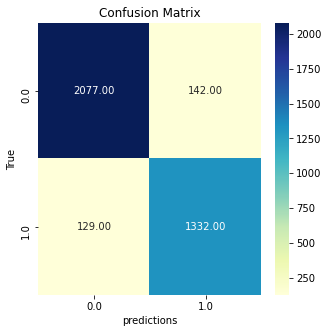

In [13]:
print(train_labels)
predict_batches(binary_predictor, train_features, train_labels)

获取测试性能

Accuracy: 0.908695652173913
Precision: 0.8695652173913043
Recall: 0.898876404494382


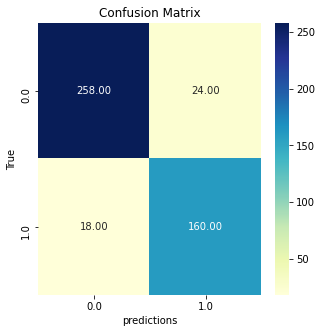

In [14]:
predict_batches(binary_predictor, test_features, test_labels)

> ### 问题 4 – 比较训练-测试结果
> 您是否看到训练和测试性能之间存在巨大差异？

**答案**：两种性能看起来非常相似。这里没有出现过拟合。

## 4.总结
在本练习中，您在 Amazon SageMaker 中使用线性学习算法构建了一个二进制分类器。您还回顾了一些重要的概念，例如训练、验证和测试拆分，混淆矩阵以及分类指标。总体上，模型在准确率、查准率和查全率指标方面的结果达到了 90% 以上。

----------------------------------------------------------------------------
# 问题 2：糖尿病进展预测（回归）

对于回归问题，您将使用一个与健康相关的数据集来预测糖尿病。

您将使用 [糖尿病数据](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)。

__Scikit-learn__ 库也托管这些数据。您将使用此库来加载数据集。

此数据集中的字段：  

输入：  
1 – 年龄  
2 – 性别  
3 – bmi（身体质量指数）  
4 – bp（血压）  
5 – s1（血清测定 1）  
6 – s2（血清测定 2）  
7 – s3（血清测定 3）   
8 – s4（血清测定 4）  
9 – s5（血清测定 5）  
10 – s6（血清测定 6）

输出：  
11 – y（基线后一年有关疾病进展的定量指标）  

## 1.获取数据

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data.astype(np.float32), diabetes.target.astype(np.float32)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (442, 10)
Y shape: (442,)


In [16]:
import pandas as pd

df = pd.DataFrame(data=np.column_stack((X, y)),
                  columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y']
                 )

**注意**：特征已提前标准化和扩展。

In [17]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


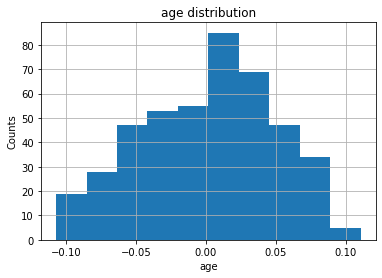

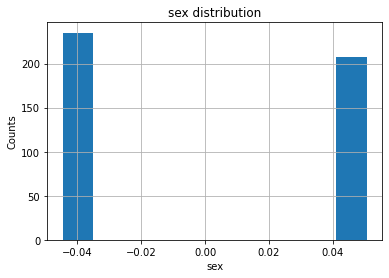

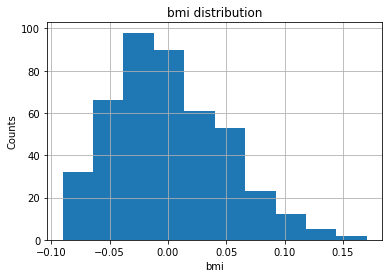

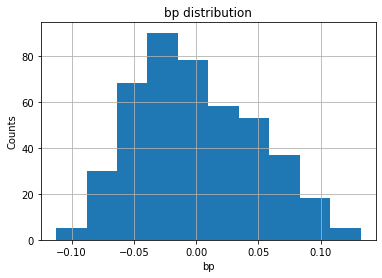

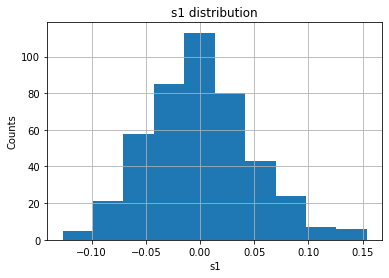

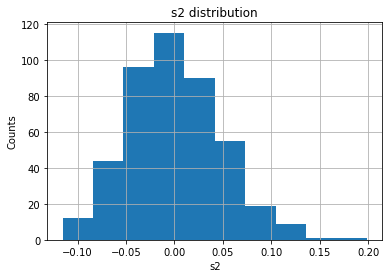

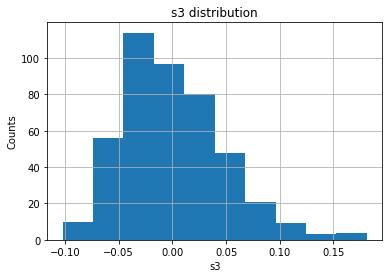

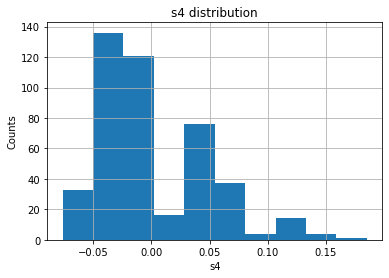

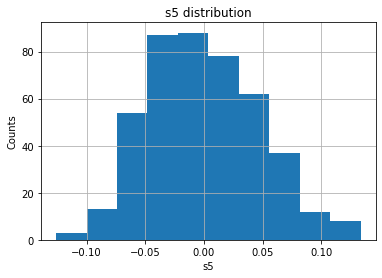

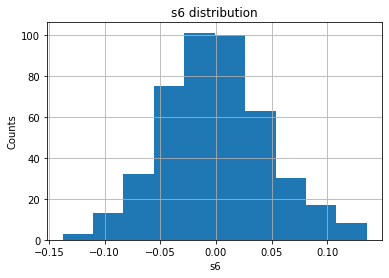

In [18]:
import matplotlib.pyplot as plt
#%matplotlib inline
for col in ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']:
    plt.hist(df[col].values)
    plt.title(col + ' distribution')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()

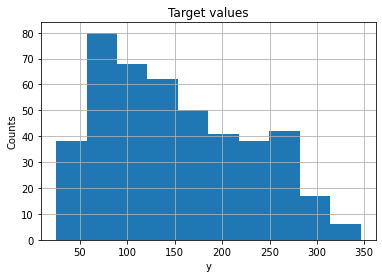

In [19]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.hist(y)
plt.title('Target values')
plt.xlabel('y')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

## 2.训练模型

在本节中，您将执行以下操作：

– 将数据集拆分为训练、验证和测试子集
– 使用 Amazon SageMaker 线性学习器算法训练模型

> ### 问题 1 – 训练-测试-验证拆分
>
> 训练机器学习模型的一个重要部分是将数据拆分为训练、验证和测试子集。您将使用“sklearn”库中的“train_test_split()”函数 [文档](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)。

> 看一下此示例：
>
> `train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)` 
>
> 此函数会按给定的比例 (test_size) 拆分输入特征“X”和目标“y”对。此特定示例将数据拆分为训练 (80%) 和测试 (20%) 子集。
>
> 使用此函数__两次__，将数据拆分为__训练 (80%)__、__验证 (10%)__ 和__测试 (10%)__ 子集。

In [20]:
from sklearn.model_selection import train_test_split

# 获取 80% 的数据用于训练；剩下的 20% 将用于验证和测试
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# 将剩余 20% 的数据一分为二，10% 用于测试，10% 用于验证
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (353, 10)
Length of train_labels is: (353,)
Length of val_features is: (45, 10)
Length of val_labels is: (45,)
Length of test_features is: (44, 10)
Length of test_labels is: (44,)


现在，调用 Amazon SageMaker 的“LinearLearner()”算法。本示例使用一个“ml.m4.xlarge”实例来进行训练。“predictor_type”设置为 __'regressor'__，因为这是一个回归问题。

In [21]:
import sagemaker

# 调用线性学习器评估程序对象
regression_model = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='regressor')

使用二进制评估程序的“record_set()”函数来设置评估程序的训练、验证和测试部分。

In [22]:
train_records = regression_model.record_set(train_features, train_labels, channel='train')
val_records = regression_model.record_set(val_features, val_labels, channel='validation')
test_records = regression_model.record_set(test_features, test_labels, channel='test')

“fit()”函数对这些数据应用回归分析。

In [23]:
regression_model.fit([train_records, val_records, test_records])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-05-17 03:52:03 Starting - Starting the training job...
2021-05-17 03:52:26 Starting - Launching requested ML instancesProfilerReport-1621223523: InProgress
......
2021-05-17 03:53:26 Starting - Preparing the instances for training......
2021-05-17 03:54:32 Downloading - Downloading input data...
2021-05-17 03:54:59 Training - Downloading the training image...
2021-05-17 03:55:32 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[05/17/2021 03:55:26 INFO 140556184659776] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale

## 3.评估模型

在本节中，您将了解模型在测试集上的表现。

### Amazon SageMaker 分析
您可以使用“sagemaker.analytics”获取一些性能指标。这不需要部署模型。由于这是一个回归问题，您可以检查**均方差*。

In [24]:
sagemaker.analytics.TrainingJobAnalytics(regression_model._current_job_name,
                                         metric_names = ['test:mse']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:mse,3095.65767


### 部署模型
要部署模型，请运行以下单元。

**注意**：这需要一些时间才能完成。在等待的过程中，请思考问题 2 的答案。

In [25]:
regression_predictor = regression_model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

>### 问题 2 – 计算均方差
>
> 在本问题中，您将计算均方差。它由以下公式得出：
>
>均方差 = $\displaystyle\frac{1}{n}\sum_{t=1}^{n}(pred_t-target_t)^2$
>
>使用 __preds__ 和 __labels__ 变量计算均方差并进行打印。

In [26]:
import matplotlib.pyplot as plt

# 获取大小为 25 的每个批次的预测结果
def predict_regression_batches(predictor, features, labels):
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(features, 25)]
    
    # 解析 protobuf 响应来提取预测标签
    extract_score = lambda x: x.label['score'].float32_tensor.values
    preds = np.concatenate([np.array([extract_score(x) for x in batch]) for batch in prediction_batches])
    preds = preds.reshape((-1,))
    
    # 计算均方差
    mse = sum((preds - labels)**2) / len(preds)
    print(mse)
    
    return preds

现在，获取训练和测试子集的结果。

In [27]:
train_predictions = predict_regression_batches(regression_predictor, train_features, train_labels)

3368.090619748552


In [28]:
test_predictions = predict_regression_batches(regression_predictor, test_features, test_labels)

3095.65763828973


### 将结果绘制成图

我们来看一些图。即使您计算出了均方差，最好还是目视检查一下结果。

### 散点图

使用散点图，您会看到拟合（预测）值与真值。在下面的图中，您会发现预测值和真值总体上遵循相似的模式。

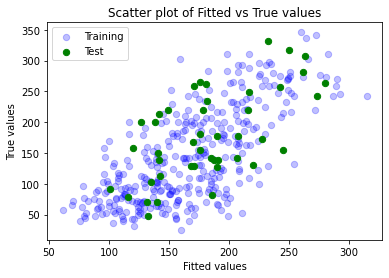

In [29]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(train_predictions, train_labels, c='b', s=40, alpha=0.25, label='Training')
plt.scatter(test_predictions, test_labels, c='g', s=40, label='Test')
plt.title("Scatter plot of Fitted vs True values")
plt.ylabel("True values")
plt.xlabel("Fitted values")
plt.legend(loc='best')
plt.show()

### 残差图

每个数据点都有残差。它是实际值和预测值之间的差。残差的计算方式如下：  
$e = y - \hat y$  

正残差意味着预测值高于真值，负残差意味着预测值低于真值。   

看一下通过运行以下数据块得出的残差图。残差有一个随机模式，这很好。您可能会看到其他模式，比如 U 形或倒 U 形模式。这两个模式指出了数据中需要解决的一些非线性问题。在本例中，我们没有这种问题。

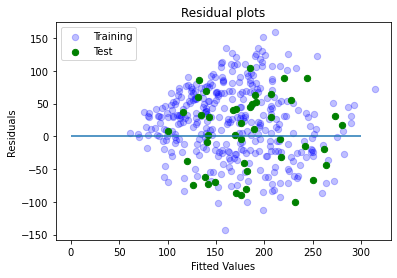

In [30]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(train_predictions, train_predictions-train_labels, c='b', s=40, alpha=0.25, label='Training')
plt.scatter(test_predictions, test_predictions-test_labels, c='g', s=40, label='Test')
plt.hlines(y=0, xmin=0, xmax=300)
plt.title("Residual plots")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.legend(loc='best')
plt.show()

>### 问题 3：残差图评估
>
>一般情况下，通过查看残差图，您可以发现某种模式。模式包括：
>– 随机模式：这意味着数据是线性的。
>– U 形或倒 U 形模式：这指出了数据中的一些非线性问题。
>
>您可以从残差图中得出什么结论？

**答案**：该图显示了随机残差，这意味着数据是线性的。

## 4.总结
在本练习中，您在 Amazon SageMaker 中使用线性学习算法构建了一个回归模型。您还涉及到了一些重要的概念，例如训练、验证和测试拆分，均方差回归指标以及残差的分析。